In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
num_heads = 3
embedding_size = 4
key_dim = 5
value_dim = 6

inputs = tf.keras.layers.Input([None, embedding_size])
multi_head_attention = tf.keras.layers.MultiHeadAttention(
    num_heads,
    key_dim,
    value_dim,
)(inputs, inputs)
model = tf.keras.Model(inputs, multi_head_attention)

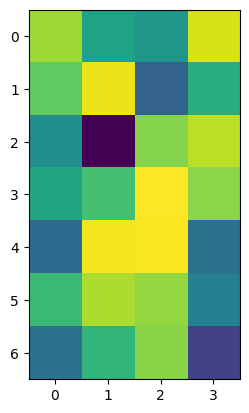

In [57]:
batch_size = 10
series_size = 7

x = tf.random.uniform([batch_size, series_size, embedding_size])
plt.imshow(x[0])

(10, 7, 4)


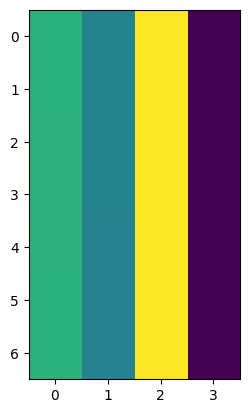

In [58]:
y = model(x)
print(y.shape)
plt.imshow(y[0])
plt.show()

In [59]:
for variable in model.trainable_variables:
    print(variable.name, variable.shape)

multi_head_attention_10/query/kernel:0 (4, 3, 5)
multi_head_attention_10/query/bias:0 (3, 5)
multi_head_attention_10/key/kernel:0 (4, 3, 5)
multi_head_attention_10/key/bias:0 (3, 5)
multi_head_attention_10/value/kernel:0 (4, 3, 6)
multi_head_attention_10/value/bias:0 (3, 6)
multi_head_attention_10/attention_output/kernel:0 (3, 6, 4)
multi_head_attention_10/attention_output/bias:0 (4,)
